<a href="https://colab.research.google.com/github/sniggel/akka-management/blob/master/Week3_Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.13.1
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_______________________________________________________________

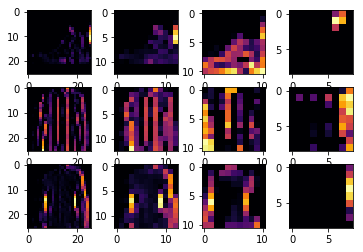

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
print(tf.__version__)

## Load MNIST
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

## Give a new shape to the array without changing its data.
## where: 60000 = nbInTrainingSet, 28 = width, 28 = height, 1 is dimension
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0

## Give a new shape to the array without changing its data.
## where: 10000 = nbInTestgSet, 28 = width, 28 = height, 1 is dimension
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

model = tf.keras.models.Sequential([
  ## Add an initial 3*3 convolution layer
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  ## Add a 2*2 hidden pooling layer, reducing the image size by half
  tf.keras.layers.MaxPooling2D(2, 2),
  ## Add a 3*3 hidden convolution layer, relu returns 0 on negative values
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  ## Add a 2*2 hidden pooling layer, reducing the image size by half
  tf.keras.layers.MaxPooling2D(2,2),
  ## Flattens the images to a 1D array (as we can see in the summary: (None, 1600) )
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Display the size and shape of the network, notice the image is reduced after
## every MaxPooling layer
model.summary()

model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

## Prints the first 100 labels in the test set
print(test_labels[:100])

## How about adding more Convolutions? What impact do you think this will have?
## Experiment with it.

## Answer:
## The execution time is way higher (4x), the loss is greater and the accuracy
## is a bit lower.